In [96]:
import pandas as pd
import numpy as np
from plotnine import *
import patchworklib as pw
import os
os.chdir('D:\Studia\MoCaDR_proj1')

In [97]:
# Col mean weight

# SVD1
res_svd1 = pd.read_csv('Results/results_svd1_all.csv')
res_svd1_long = pd.melt(res_svd1, id_vars=['r'], value_vars=res_svd1.columns[1:])
best_r = res_svd1_long.iloc[res_svd1_long['value'].idxmin()]['r']
best_rmse = res_svd1_long['value'].min()
# SVD2
res_svd2 = pd.read_csv('Results/results_svd2_all.csv')
res_svd2_long = pd.melt(res_svd2, id_vars=['r'], value_vars=res_svd2.columns[1:])
best_r2 = res_svd2_long.iloc[res_svd2_long['value'].idxmin()]['r']
best_rmse2 = res_svd2_long['value'].min()
# NMF
res_nmf = pd.read_csv('Results/results_nmf_all.csv')
res_nmf_long = pd.melt(res_nmf, id_vars=['r'], value_vars=res_nmf.columns[1:])
best_r3 = res_nmf_long.iloc[res_nmf_long['value'].idxmin()]['r']
best_rmse3 = res_nmf_long['value'].min()
# Weights
res_weights = pd.read_csv('Results/results_weights.csv')
res_weights_long = pd.melt(res_weights, id_vars=['Column weight'], value_vars=res_weights.columns[1:])
best_w = res_weights_long.iloc[res_weights_long.groupby('variable')['value'].idxmin()]

# SVD 1

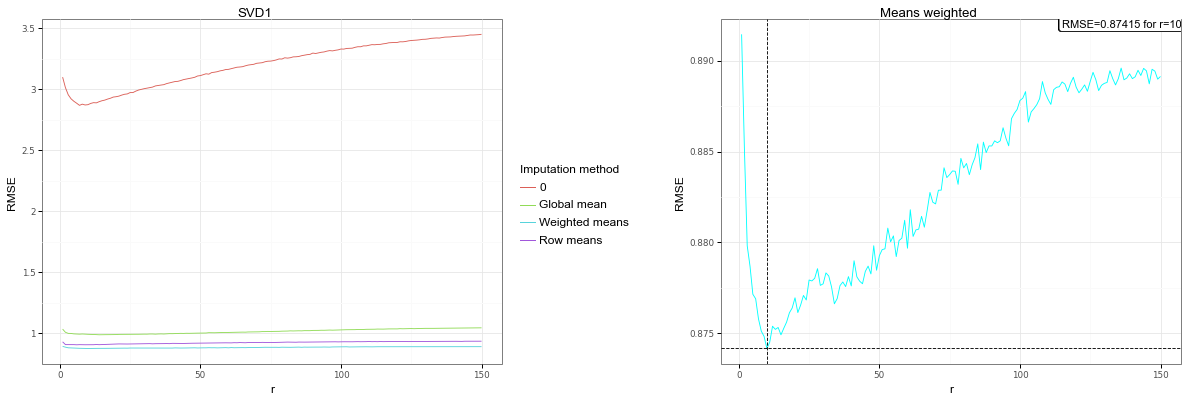

In [98]:
plot_svd1 = ggplot(res_svd1_long) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable')) + \
    labs(y="RMSE", color="Imputation method", title="SVD1") + \
    scale_color_discrete(labels=['0', 'Global mean', 'Weighted means', 'Row means'])
plot_svd1_w = ggplot(res_svd1_long[res_svd1_long['variable'] == 'rmse_means_weighted']) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value'), color='cyan') + \
    geom_hline(yintercept=best_rmse, linetype='dashed', color='black') + \
    geom_vline(xintercept=best_r, linetype='dashed', color='black') + \
    geom_label(aes(x=float('inf'), y=float('inf')), label=f'RMSE={str(np.round(best_rmse, 5))} for r={str(best_r)}', va="top", ha="right") + \
    labs(y='RMSE', title="Means weighted")
p1 = pw.load_ggplot(plot_svd1)
p2 = pw.load_ggplot(plot_svd1_w)
plot_svd1w = p1|p2
plot_svd1w.savefig('Report/fig/svd1_all.png')

# SVD2

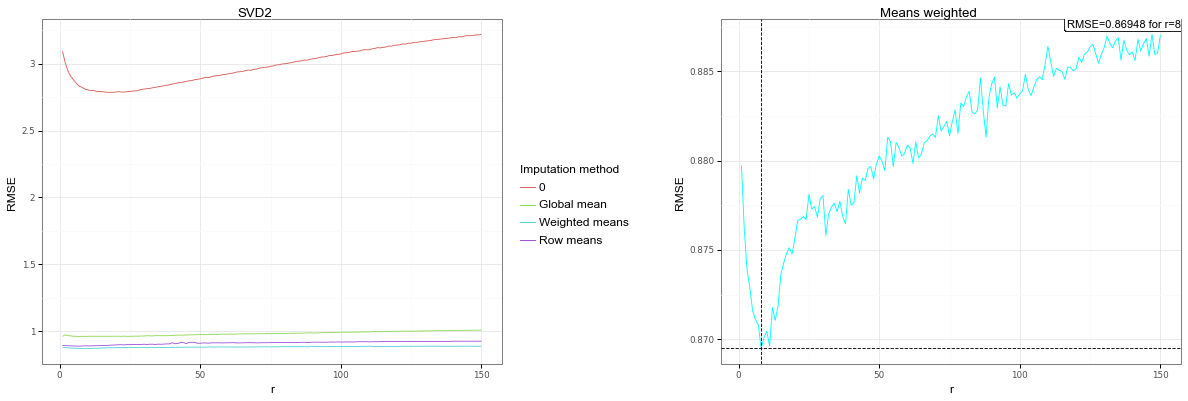

In [99]:
plot_svd2 = ggplot(res_svd2_long) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable')) + \
    labs(y="RMSE", color="Imputation method", title="SVD2") + \
    scale_color_discrete(labels=['0', 'Global mean', 'Weighted means', 'Row means'])
plot_svd2_w = ggplot(res_svd2_long[res_svd2_long['variable'] == 'rmse_means_weighted']) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value'), color='cyan') + \
    geom_hline(yintercept=best_rmse2, linetype='dashed', color='black') + \
    geom_vline(xintercept=best_r2, linetype='dashed', color='black') + \
    geom_label(aes(x=float('inf'), y=float('inf')), label=f'RMSE={str(np.round(best_rmse2, 5))} for r={str(best_r2)}', va="top", ha="right") + \
    labs(y='RMSE', title='Means weighted')
p3 = pw.load_ggplot(plot_svd2)
p4 = pw.load_ggplot(plot_svd2_w)
plot_svd2w = p3|p4
plot_svd2w.savefig('Report/fig/svd2_all.png')

# NMF

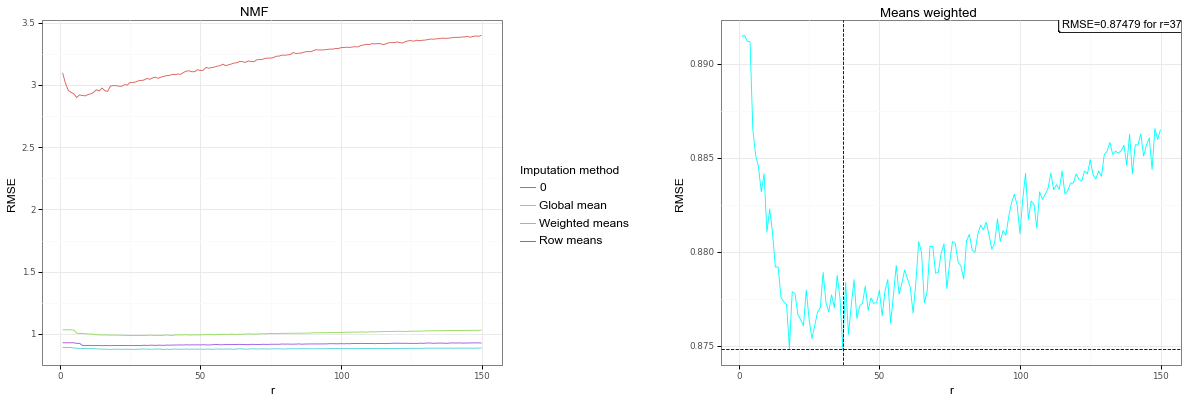

In [100]:
plot_nmf = ggplot(res_nmf_long) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable')) + \
    labs(y="RMSE", color="Imputation method", title="NMF") + \
    scale_color_discrete(labels=['0', 'Global mean', 'Weighted means', 'Row means'])
plot_nmf_w = ggplot(res_nmf_long[res_nmf_long['variable'] == 'rmse_means_weighted']) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value'), color='cyan') + \
    geom_hline(yintercept=best_rmse3, linetype='dashed', color='black') + \
    geom_vline(xintercept=best_r3, linetype='dashed', color='black') + \
    geom_label(aes(x=float('inf'), y=float('inf')), label=f'RMSE={str(np.round(best_rmse3, 5))} for r={str(best_r3)}', va="top", ha="right") + \
    labs(y='RMSE', title='Means weighted')
p5 = pw.load_ggplot(plot_nmf)
p6 = pw.load_ggplot(plot_nmf_w)
plot_nmfw = p5|p6
plot_nmfw.savefig('Report/fig/nmf_all.png')

# Weights for imputation

In [101]:
plot_weights = ggplot(res_weights_long) + \
    theme_bw() + \
    geom_line(aes(x='Column weight', y='value', color='variable')) + \
    labs(y="RMSE", color="Method", title="RMSE for different weights ") + \
    scale_color_discrete(labels=['NMF', 'SVD1', 'SVD2'])
plot_weights.save('Report/fig/weights.png')

In [102]:
# Best weights
best_w

,Column weight,variable,value
242,0.40,NMF,0.877122
37,0.37,SVD1,0.873767
133,0.32,SVD2,0.868374
